# 연습문제

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential      # 순서층을 구성하는 모델 객체 생성 기능
from tensorflow.keras.layers import Dense           # 모델 객체에 학습을 위한 층을 쌓는다.
from tensorflow.keras.optimizers import RMSprop,SGD # 옵티마이저
from tensorflow.keras.losses import mse             # 활성화 함수
import pandas as pd 
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
import helper


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
# 학습에 대한 콜백함수 참조
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

## #02. 데이터 준비

In [2]:
origin = pd.read_excel('biostat.xlsx')
origin.head()

,id,age,sex,weight,OP_date,Recur,Recur_1y,Recur_date,SBP,CA19.9,CRP,CEA,post.CEA,stage,smoking,obesity,post.CA19.9,post.CA19.9.binary,post.CA19.9.3grp
0,1,82,1,73.994588,2014-07-10,1,0,2015-08-12,144.286869,4490.5,0.1,3.0,5.1,3,1,1,36.795194,0,1
1,2,50,0,64.819694,2013-05-08,0,0,2018-07-07,108.590964,36.7,0.1,1.1,1.5,3,1,0,32.765043,0,1
2,3,28,1,63.204675,2016-05-06,0,0,2020-01-13,5.629379,36.7,0.1,10.7,12.4,3,1,0,31.133072,0,1
3,4,35,1,52.499192,2015-11-24,1,0,2017-08-07,143.931300,64.9,1.3,1.3,0.4,3,1,1,36.134051,0,1
4,5,49,1,72.766264,2015-02-12,1,0,2016-06-02,172.653143,38.2,10.7,3.7,0.4,3,1,0,33.921657,0,1


## #03. 데이터 전처리

In [3]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  156 non-null    int64         
 1   age                 156 non-null    int64         
 2   sex                 156 non-null    int64         
 3   weight              156 non-null    float64       
 4   OP_date             156 non-null    datetime64[ns]
 5   Recur               156 non-null    int64         
 6   Recur_1y            156 non-null    int64         
 7   Recur_date          156 non-null    datetime64[ns]
 8   SBP                 156 non-null    float64       
 9   CA19.9              156 non-null    float64       
 10  CRP                 156 non-null    float64       
 11  CEA                 156 non-null    float64       
 12  post.CEA            156 non-null    float64       
 13  stage               156 non-null    int64         

In [4]:
origin.columns

Index(['id', 'age', 'sex', 'weight', 'OP_date', 'Recur', 'Recur_1y',
       'Recur_date', 'SBP', 'CA19.9', 'CRP', 'CEA', 'post.CEA', 'stage',
       'smoking', 'obesity', 'post.CA19.9', 'post.CA19.9.binary',
       'post.CA19.9.3grp'],
      dtype='object')

In [5]:
num_col = ['age','weight','SBP','CA19.9','CRP','CEA','post.CEA','post.CA19.9']
origin.loc[:,num_col].head()

,age,weight,SBP,CA19.9,CRP,CEA,post.CEA,post.CA19.9
0,82,73.994588,144.286869,4490.5,0.1,3.0,5.1,36.795194
1,50,64.819694,108.590964,36.7,0.1,1.1,1.5,32.765043
2,28,63.204675,5.629379,36.7,0.1,10.7,12.4,31.133072
3,35,52.499192,143.931300,64.9,1.3,1.3,0.4,36.134051
4,49,72.766264,172.653143,38.2,10.7,3.7,0.4,33.921657


In [6]:
origin.head()

,id,age,sex,weight,OP_date,Recur,Recur_1y,Recur_date,SBP,CA19.9,CRP,CEA,post.CEA,stage,smoking,obesity,post.CA19.9,post.CA19.9.binary,post.CA19.9.3grp
0,1,82,1,73.994588,2014-07-10,1,0,2015-08-12,144.286869,4490.5,0.1,3.0,5.1,3,1,1,36.795194,0,1
1,2,50,0,64.819694,2013-05-08,0,0,2018-07-07,108.590964,36.7,0.1,1.1,1.5,3,1,0,32.765043,0,1
2,3,28,1,63.204675,2016-05-06,0,0,2020-01-13,5.629379,36.7,0.1,10.7,12.4,3,1,0,31.133072,0,1
3,4,35,1,52.499192,2015-11-24,1,0,2017-08-07,143.931300,64.9,1.3,1.3,0.4,3,1,1,36.134051,0,1
4,5,49,1,72.766264,2015-02-12,1,0,2016-06-02,172.653143,38.2,10.7,3.7,0.4,3,1,0,33.921657,0,1


In [7]:
cat_col=['sex','Recur_1y','stage','smoking','obesity','post.CA19.9.binary','post.CA19.9.3grp']
origin.loc[:,cat_col].head()

,sex,Recur_1y,stage,smoking,obesity,post.CA19.9.binary,post.CA19.9.3grp
0,1,0,3,1,1,0,1
1,0,0,3,1,0,0,1
2,1,0,3,1,0,0,1
3,1,0,3,1,1,0,1
4,1,0,3,1,0,0,1


id	교유번호	


age	나이	

sex	성별	0=여성, 1=남성

weight	체중	

OP_date	수술 날짜	

Recur	재발 여부	1=재발, 0=마지막 관찰시점까지 재발 안함

Recur_1y	1년 내 재발 여부 	1=1년 내 재발, 0=1년 내 재발 안함

Recur_date	재발 날짜	재발하지 않은 환자의 경우 마지막 검사 날짜

SBP	수축기 혈압	

CA19.9	종양표지자의 일종인 CA19-9값	

CRP	C-반응 단백질 수치	

CEA	종용표지자의 일종인 CEA 값	

post.CEA	수술 직후 CEA 값	

stage	암의 병기	1, 2, 3

smoking	흡연 여부	1=흡연, 0=비흡연

obesity	비만 여부	1=비만, 0=정상

post.CA19.9	수술 직후 CA19-9값	

post.CA19.9.binary	post.CA19.9가 37 초과이면 1, 37 이하이면 0	

post.CA19.9.3grp	post.CA19.9가 37 이하이면 1, 37초과 100 이히면 2, 70 초과이면 3	


### 연속형 변수의 데이터 분포 확인 

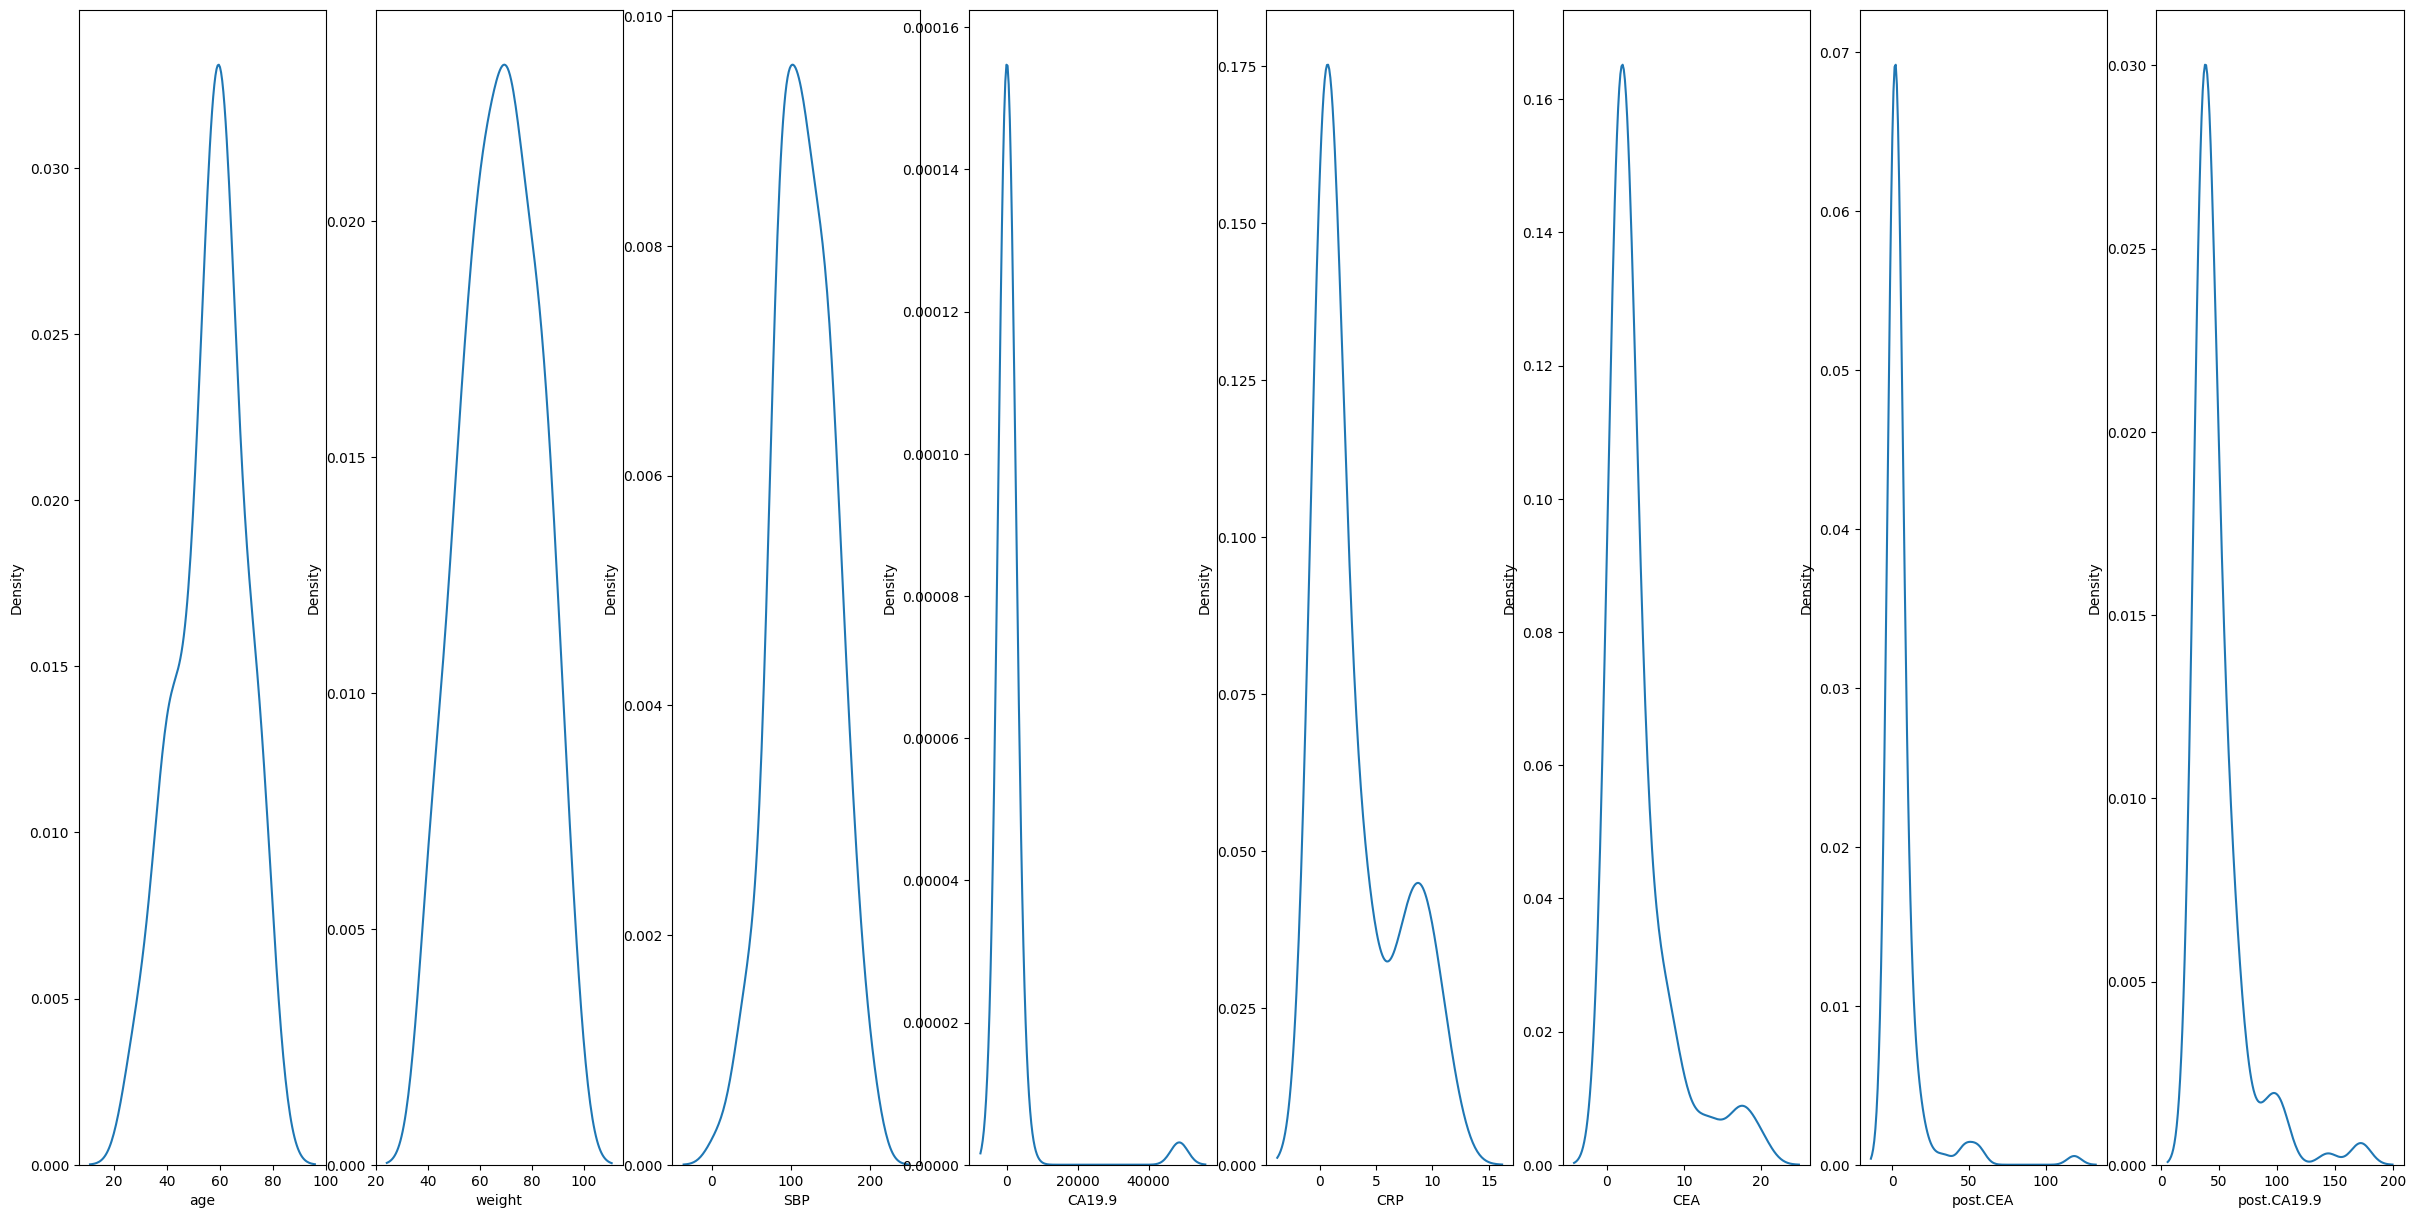

In [8]:
fig, ax = plt.subplots(1,len(num_col),figsize=(30,15))
for col,ax in zip(num_col,ax):
    sns.kdeplot(data=origin,x=col,ax=ax)
    

### 명목형 변수의 빈도수 확인 

In [9]:
cat_col

['sex',
 'Recur_1y',
 'stage',
 'smoking',
 'obesity',
 'post.CA19.9.binary',
 'post.CA19.9.3grp']

In [10]:
for col in cat_col :
    print(col,"의 빈도수 ")
    print(origin[col].value_counts())
    print('----------------------')

sex 의 빈도수 
sex
1    102
0     54
Name: count, dtype: int64
----------------------
Recur_1y 의 빈도수 
Recur_1y
0    102
1     54
Name: count, dtype: int64
----------------------
stage 의 빈도수 
stage
3    78
2    42
1    36
Name: count, dtype: int64
----------------------
smoking 의 빈도수 
smoking
0    115
1     41
Name: count, dtype: int64
----------------------
obesity 의 빈도수 
obesity
0    96
1    60
Name: count, dtype: int64
----------------------
post.CA19.9.binary 의 빈도수 
post.CA19.9.binary
1    95
0    61
Name: count, dtype: int64
----------------------
post.CA19.9.3grp 의 빈도수 
post.CA19.9.3grp
2    81
1    61
3    14
Name: count, dtype: int64
----------------------


### 명목형 변수의 데이터 확인

C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118:

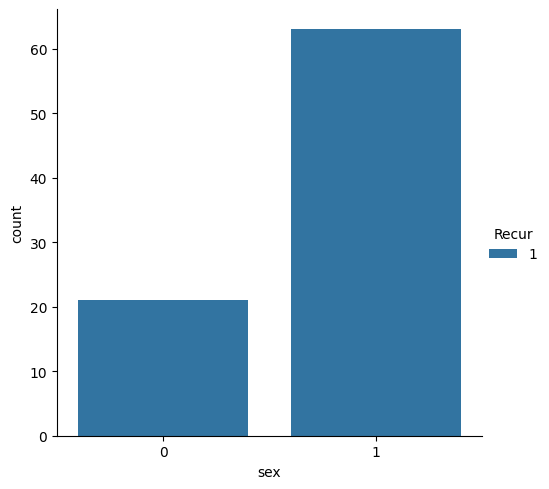

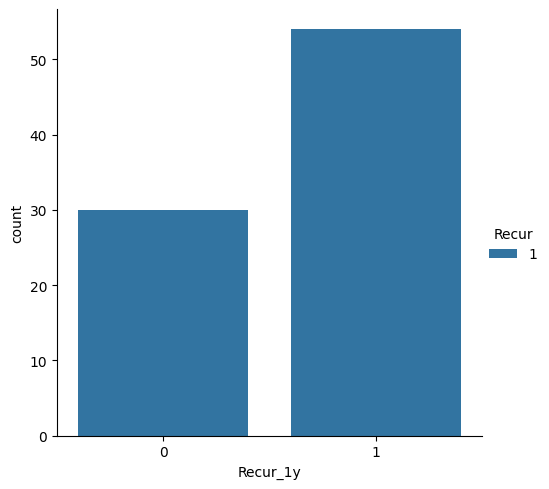

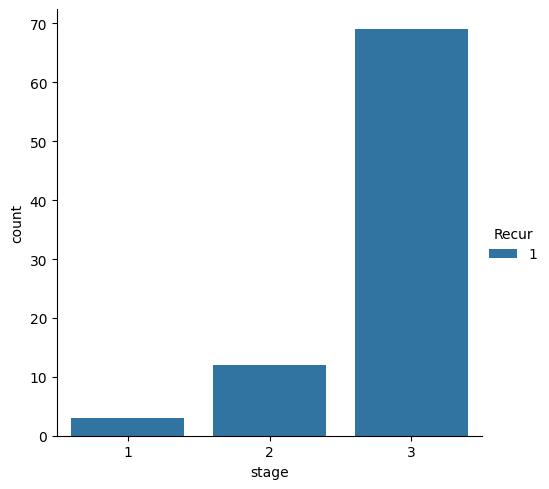

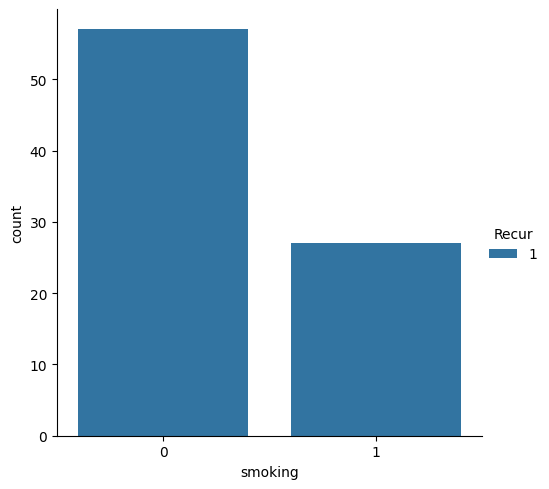

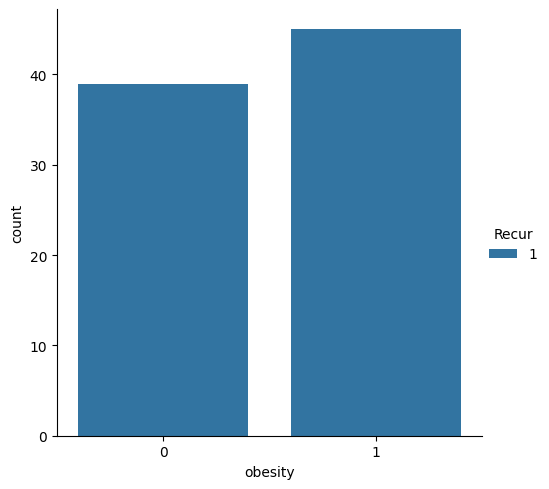

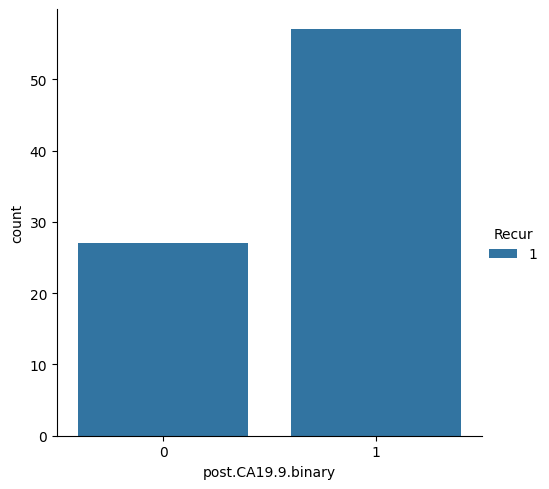

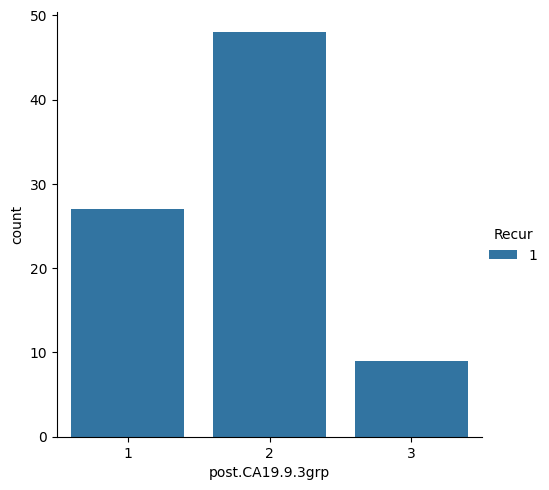

In [11]:

for i,col in enumerate(cat_col) :
    sns.catplot(data=origin.loc[origin['Recur']==1,:],x=col,kind='count',hue='Recur')

C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118:

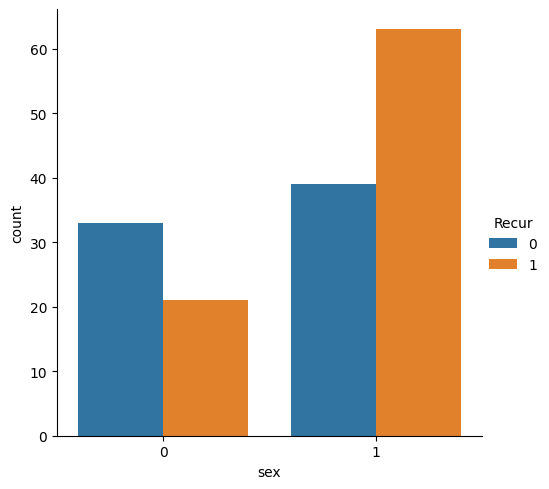

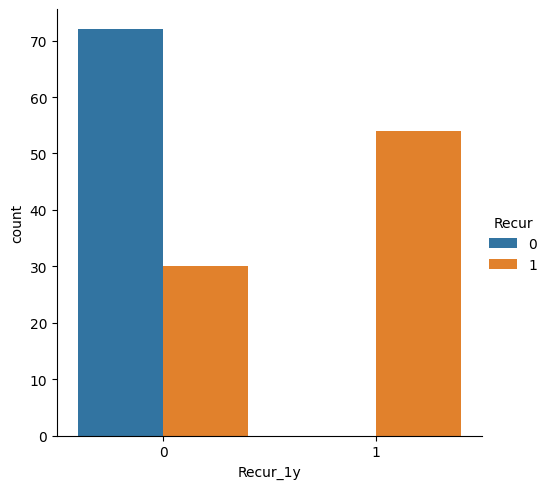

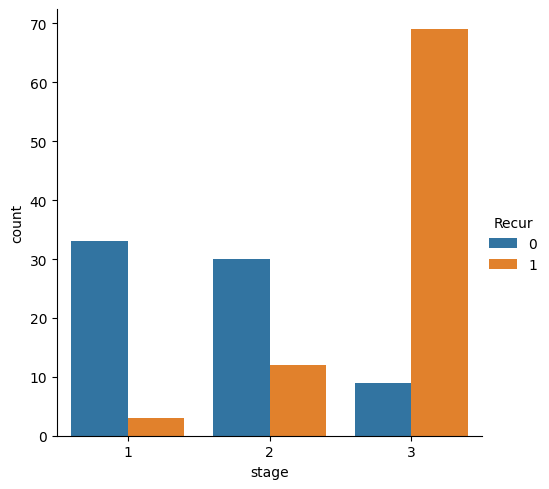

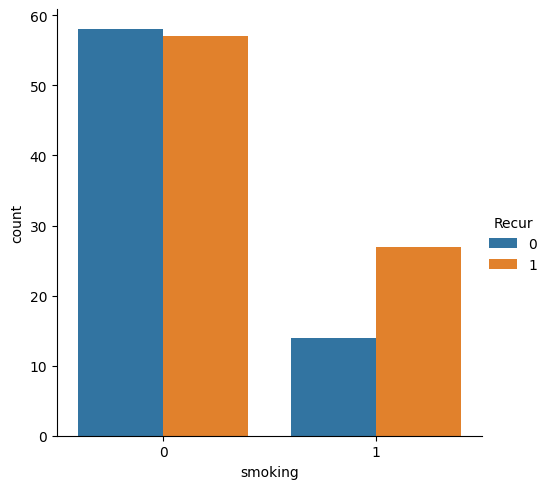

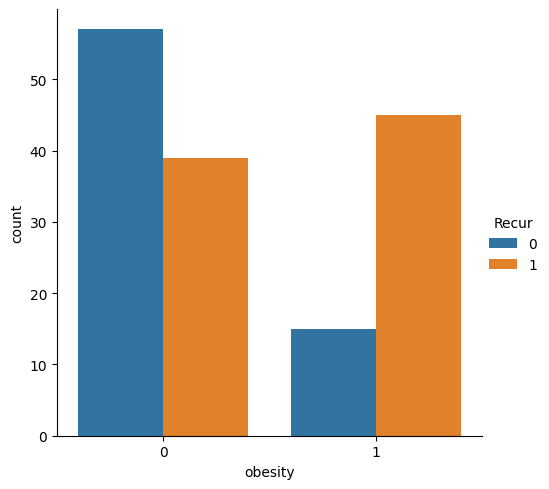

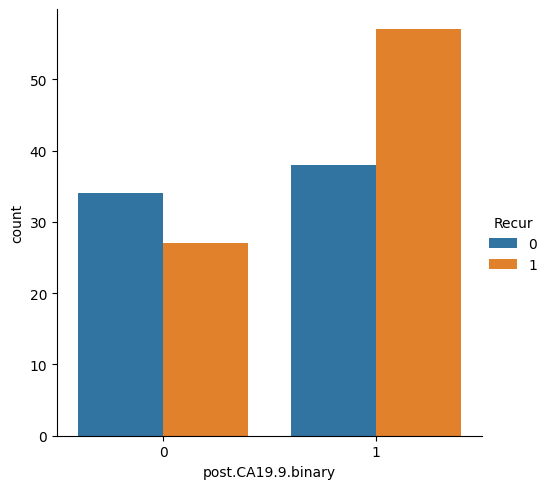

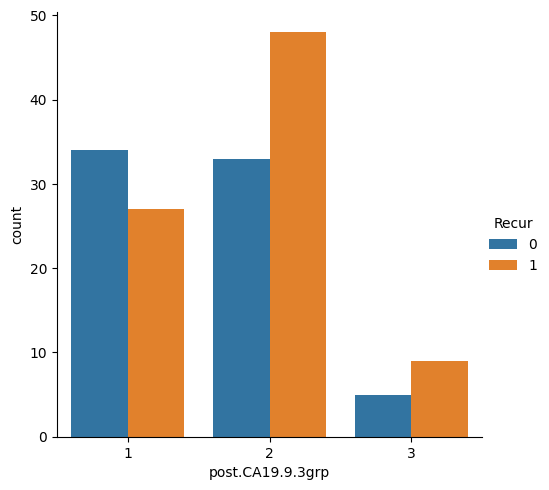

In [12]:
for i,col in enumerate(cat_col) :
    sns.catplot(data=origin,x=col,kind='count',hue='Recur')

C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118:

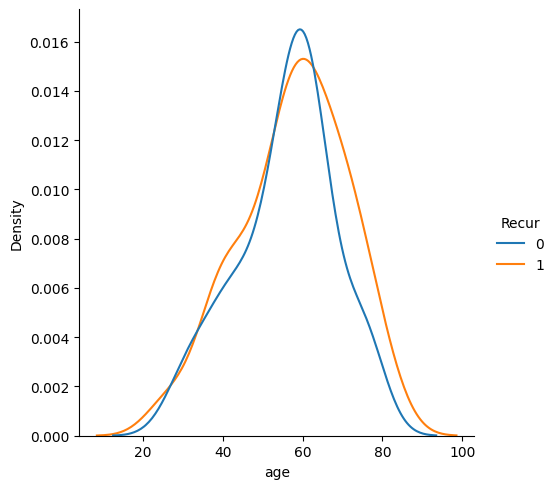

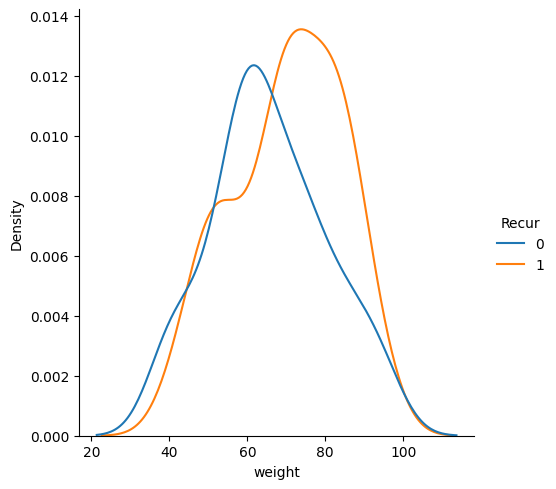

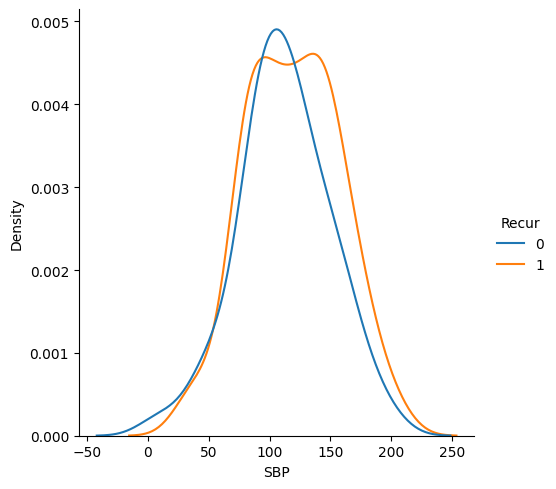

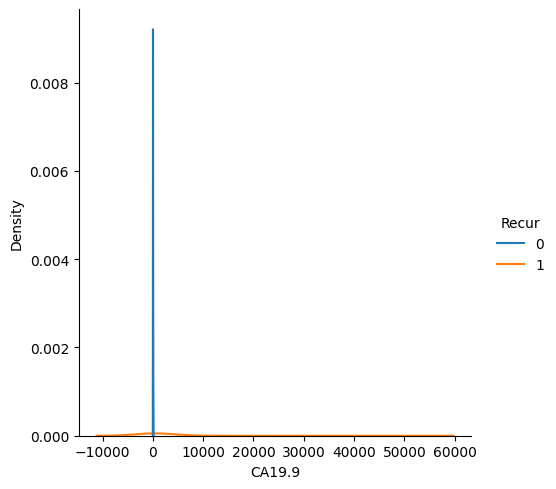

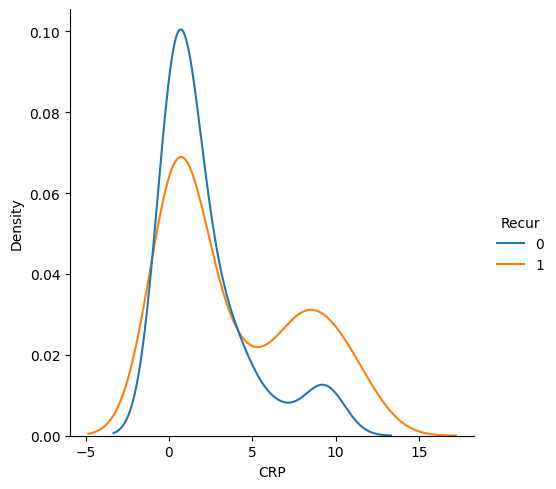

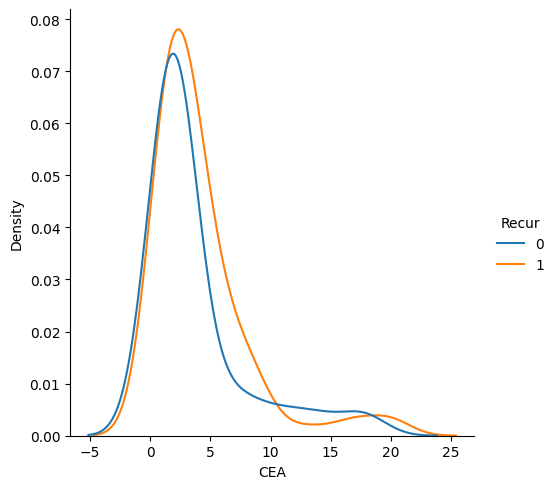

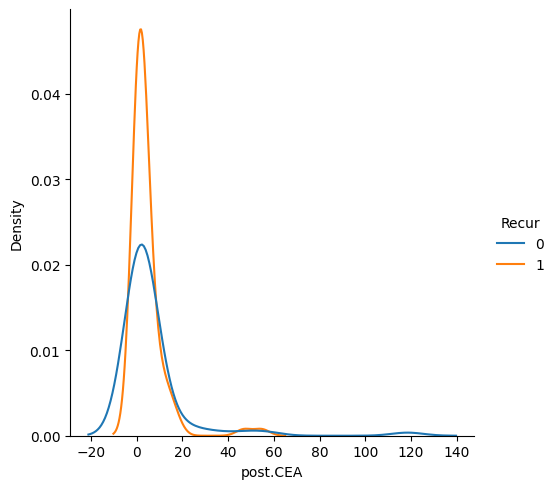

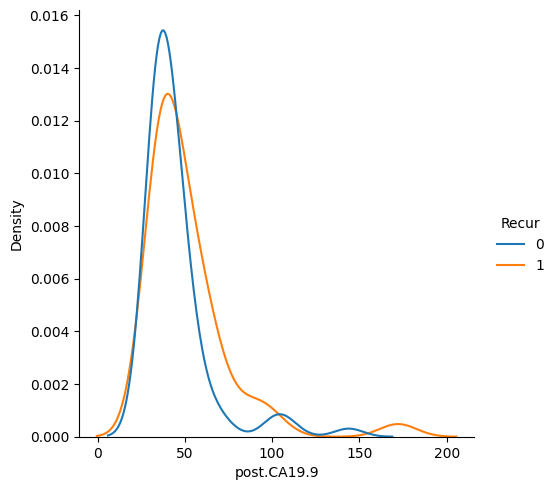

In [13]:
for col in num_col:
    sns.displot(x=col,hue='Recur',kind='kde',data=origin)
plt.show()
plt.close()

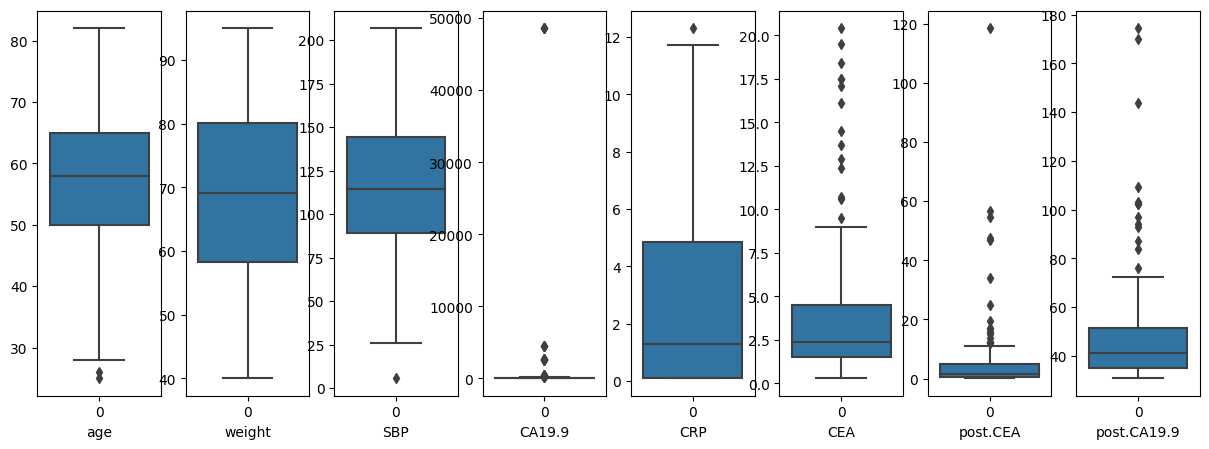

In [14]:
fig,ax = plt.subplots(1,len(num_col),figsize=(15,5))

for i,col in enumerate(num_col) :
    sns.boxplot(origin[col],ax=ax[i])
    ax[i].set_xlabel(col)
## 이상치 제거 및 표준화 필요

성별에 따라 재발수의 차이가 있음

암의 기수에 따라 재발횟수에 차이 존재

흡연여부에 따라 재발 횟수에 차이 ㅇ

비만도는 크게 차이 없음

post.CA19.9.binary 가 1이면 재발하는 횟수 많음

post.CA19.9.3grp 가 2인경우 재발 많이함

이상치 제거 및 표준화 필요

In [15]:
origin.head()

,id,age,sex,weight,OP_date,Recur,Recur_1y,Recur_date,SBP,CA19.9,CRP,CEA,post.CEA,stage,smoking,obesity,post.CA19.9,post.CA19.9.binary,post.CA19.9.3grp
0,1,82,1,73.994588,2014-07-10,1,0,2015-08-12,144.286869,4490.5,0.1,3.0,5.1,3,1,1,36.795194,0,1
1,2,50,0,64.819694,2013-05-08,0,0,2018-07-07,108.590964,36.7,0.1,1.1,1.5,3,1,0,32.765043,0,1
2,3,28,1,63.204675,2016-05-06,0,0,2020-01-13,5.629379,36.7,0.1,10.7,12.4,3,1,0,31.133072,0,1
3,4,35,1,52.499192,2015-11-24,1,0,2017-08-07,143.931300,64.9,1.3,1.3,0.4,3,1,1,36.134051,0,1
4,5,49,1,72.766264,2015-02-12,1,0,2016-06-02,172.653143,38.2,10.7,3.7,0.4,3,1,0,33.921657,0,1


<Axes: xlabel='age', ylabel='Recur'>

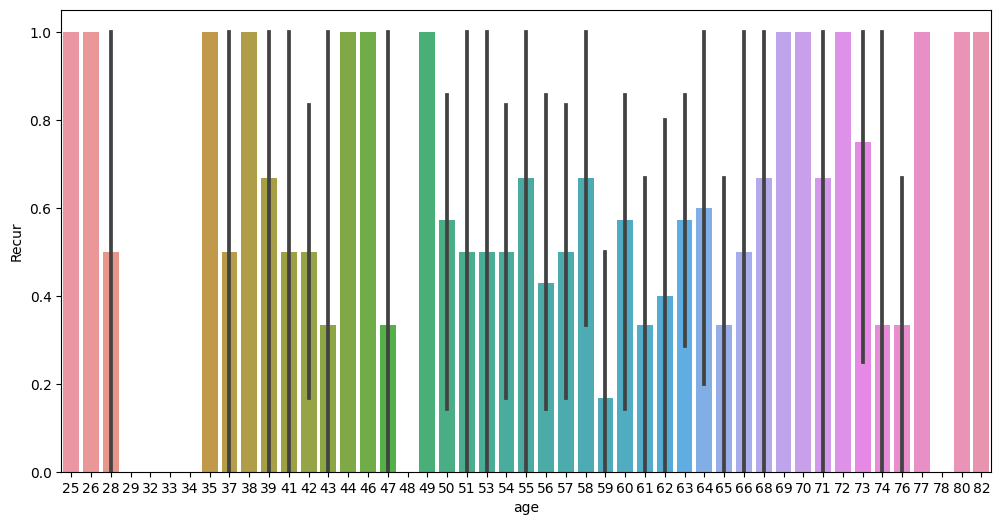

In [16]:
## 나이
plt.figure(figsize=(12,6))

sns.barplot(x=origin['age'],y=origin['Recur'],data=origin)

나이 제거 

In [17]:
origin.head()

,id,age,sex,weight,OP_date,Recur,Recur_1y,Recur_date,SBP,CA19.9,CRP,CEA,post.CEA,stage,smoking,obesity,post.CA19.9,post.CA19.9.binary,post.CA19.9.3grp
0,1,82,1,73.994588,2014-07-10,1,0,2015-08-12,144.286869,4490.5,0.1,3.0,5.1,3,1,1,36.795194,0,1
1,2,50,0,64.819694,2013-05-08,0,0,2018-07-07,108.590964,36.7,0.1,1.1,1.5,3,1,0,32.765043,0,1
2,3,28,1,63.204675,2016-05-06,0,0,2020-01-13,5.629379,36.7,0.1,10.7,12.4,3,1,0,31.133072,0,1
3,4,35,1,52.499192,2015-11-24,1,0,2017-08-07,143.931300,64.9,1.3,1.3,0.4,3,1,1,36.134051,0,1
4,5,49,1,72.766264,2015-02-12,1,0,2016-06-02,172.653143,38.2,10.7,3.7,0.4,3,1,0,33.921657,0,1


In [18]:
## 수술후와 재발 기간 사이에 따른 재발여부 차이가 있는지 확인 ㄱ
origin['gap'] = origin['Recur_date'] - origin['OP_date']
origin['gap'].head()

0    398 days
1   1886 days
2   1347 days
3    622 days
4    476 days
Name: gap, dtype: timedelta64[ns]

In [19]:
origin.head()


,id,age,sex,weight,OP_date,Recur,Recur_1y,Recur_date,SBP,CA19.9,CRP,CEA,post.CEA,stage,smoking,obesity,post.CA19.9,post.CA19.9.binary,post.CA19.9.3grp,gap
0,1,82,1,73.994588,2014-07-10,1,0,2015-08-12,144.286869,4490.5,0.1,3.0,5.1,3,1,1,36.795194,0,1,398 days
1,2,50,0,64.819694,2013-05-08,0,0,2018-07-07,108.590964,36.7,0.1,1.1,1.5,3,1,0,32.765043,0,1,1886 days
2,3,28,1,63.204675,2016-05-06,0,0,2020-01-13,5.629379,36.7,0.1,10.7,12.4,3,1,0,31.133072,0,1,1347 days
3,4,35,1,52.499192,2015-11-24,1,0,2017-08-07,143.931300,64.9,1.3,1.3,0.4,3,1,1,36.134051,0,1,622 days
4,5,49,1,72.766264,2015-02-12,1,0,2016-06-02,172.653143,38.2,10.7,3.7,0.4,3,1,0,33.921657,0,1,476 days


In [20]:
# plt.figure(figsize=(12,6))

# sns.barplot(x='gap',y='Recur',data=origin.loc[origin['Recur']==1,'Recur'])

In [21]:
# ## 일단 연속형 번수 이상치 제거 
# clean_df = origin.copy()

# for col in num_col : 
#     col_data = clean_df[col]
#     Q1 = clean_df[col].quantile(0.25)
#     Q3 = clean_df[col].quantile(0.75)
#     IQR = Q3-Q1
#     low_outlier = Q1 - 1.5 * IQR
#     high_outlier = Q3 + 1.5 * IQR
#     print(len(clean_df))
#     clean_df = clean_df[(clean_df[col]>=low_outlier) & (clean_df[col]<=high_outlier)]
# clean_df.info()


In [22]:
# clean_df.head()

In [23]:

len(origin.loc[(origin['post.CA19.9']>=70),:])/len(origin.loc[(origin['Recur']==1),:])

0.16666666666666666

In [24]:
len(origin.loc[(origin['post.CA19.9.3grp']==3),:])/len(origin.loc[(origin['Recur']==1),:])

0.16666666666666666

In [25]:
len(origin.loc[(origin['post.CA19.9.3grp']==2),:])/len(origin.loc[(origin['Recur']==1),:])

0.9642857142857143

19.9가 높으면 재발할 확률이 높지만 증가할수록 재발률이 높아지는건 아님 .- > 연속형 post.CA19.9.3grp 제거 
                         post.CA19.9.binary 도 제거 

In [26]:
origin.head()

,id,age,sex,weight,OP_date,Recur,Recur_1y,Recur_date,SBP,CA19.9,CRP,CEA,post.CEA,stage,smoking,obesity,post.CA19.9,post.CA19.9.binary,post.CA19.9.3grp,gap
0,1,82,1,73.994588,2014-07-10,1,0,2015-08-12,144.286869,4490.5,0.1,3.0,5.1,3,1,1,36.795194,0,1,398 days
1,2,50,0,64.819694,2013-05-08,0,0,2018-07-07,108.590964,36.7,0.1,1.1,1.5,3,1,0,32.765043,0,1,1886 days
2,3,28,1,63.204675,2016-05-06,0,0,2020-01-13,5.629379,36.7,0.1,10.7,12.4,3,1,0,31.133072,0,1,1347 days
3,4,35,1,52.499192,2015-11-24,1,0,2017-08-07,143.931300,64.9,1.3,1.3,0.4,3,1,1,36.134051,0,1,622 days
4,5,49,1,72.766264,2015-02-12,1,0,2016-06-02,172.653143,38.2,10.7,3.7,0.4,3,1,0,33.921657,0,1,476 days


In [27]:
# ## 일단 연속형 번수 이상치 제거 
# clean_df = origin.copy()

# for col in num_col : 
#     col_data = clean_df[col]
#     Q1 = clean_df[col].quantile(0.25)
#     Q3 = clean_df[col].quantile(0.75)
#     IQR = Q3-Q1
#     low_outlier = Q1 - 1.5 * IQR
#     high_outlier = Q3 + 1.5 * IQR
#     print(len(clean_df))
#     clean_df = clean_df[(clean_df[col]>=low_outlier) & (clean_df[col]<=high_outlier)]
# clean_df.info()


In [28]:
# df = clean_df.copy()
# df.head()

In [29]:

# df.loc[df['post.CA19.9.3grp']==3,'post.CA19.9']

In [30]:
origin.head()

,id,age,sex,weight,OP_date,Recur,Recur_1y,Recur_date,SBP,CA19.9,CRP,CEA,post.CEA,stage,smoking,obesity,post.CA19.9,post.CA19.9.binary,post.CA19.9.3grp,gap
0,1,82,1,73.994588,2014-07-10,1,0,2015-08-12,144.286869,4490.5,0.1,3.0,5.1,3,1,1,36.795194,0,1,398 days
1,2,50,0,64.819694,2013-05-08,0,0,2018-07-07,108.590964,36.7,0.1,1.1,1.5,3,1,0,32.765043,0,1,1886 days
2,3,28,1,63.204675,2016-05-06,0,0,2020-01-13,5.629379,36.7,0.1,10.7,12.4,3,1,0,31.133072,0,1,1347 days
3,4,35,1,52.499192,2015-11-24,1,0,2017-08-07,143.931300,64.9,1.3,1.3,0.4,3,1,1,36.134051,0,1,622 days
4,5,49,1,72.766264,2015-02-12,1,0,2016-06-02,172.653143,38.2,10.7,3.7,0.4,3,1,0,33.921657,0,1,476 days


In [31]:
origin = origin.loc[origin['CA19.9']<=40000,:]

In [32]:
from scipy import stats
for i,col in enumerate(num_col):
    print(col,'의 t검정')
    print(stats.ttest_ind(origin.loc[origin['Recur']==1,col],origin.loc[origin['Recur']==0,col]))    
    print('-------------')

age 의 t검정
TtestResult(statistic=0.7784511395218776, pvalue=0.437521231915984, df=151.0)
-------------
weight 의 t검정
TtestResult(statistic=1.8649827573942792, pvalue=0.06412448425397722, df=151.0)
-------------
SBP 의 t검정
TtestResult(statistic=1.0290807587033453, pvalue=0.30508729681561253, df=151.0)
-------------
CA19.9 의 t검정
TtestResult(statistic=3.0735279157030915, pvalue=0.002510780255818825, df=151.0)
-------------
CRP 의 t검정
TtestResult(statistic=2.752673073056171, pvalue=0.0066362046547024465, df=151.0)
-------------
CEA 의 t검정
TtestResult(statistic=0.5797396051211952, pvalue=0.5629542208057021, df=151.0)
-------------
post.CEA 의 t검정
TtestResult(statistic=-1.035377165142542, pvalue=0.3021480922838893, df=151.0)
-------------
post.CA19.9 의 t검정
TtestResult(statistic=1.9309894498312774, pvalue=0.0553578199631582, df=151.0)
-------------


> age, SBP, CEA,  post.CEA 제거 

In [33]:
origin['gap'].describe()

count                            153
mean     811 days 05:38:49.411764704
std      668 days 18:53:17.531500952
min                  1 days 00:00:00
25%                234 days 00:00:00
50%                645 days 00:00:00
75%               1393 days 00:00:00
max               2537 days 00:00:00
Name: gap, dtype: object

In [34]:
# origin['gap'] = origin['gap'].astype('str')

In [35]:
# origin['gap']

In [36]:
# origin['gap'] = origin['gap'].str.split(' ')[0][0]


In [37]:
# for i,val in enumerate(origin['gap']):
#     val = val.split(' ')[0]
#     # origin['gap'] = val
#     origin['gap'][i] = val
#     print(origin['gap'][i])

In [38]:
# origin['gap'] = origin['gap'].astype('int')
# origin.info()

In [39]:
# origin['gap'].describe()

In [40]:
origin.head()

,id,age,sex,weight,OP_date,Recur,Recur_1y,Recur_date,SBP,CA19.9,CRP,CEA,post.CEA,stage,smoking,obesity,post.CA19.9,post.CA19.9.binary,post.CA19.9.3grp,gap
0,1,82,1,73.994588,2014-07-10,1,0,2015-08-12,144.286869,4490.5,0.1,3.0,5.1,3,1,1,36.795194,0,1,398 days
1,2,50,0,64.819694,2013-05-08,0,0,2018-07-07,108.590964,36.7,0.1,1.1,1.5,3,1,0,32.765043,0,1,1886 days
2,3,28,1,63.204675,2016-05-06,0,0,2020-01-13,5.629379,36.7,0.1,10.7,12.4,3,1,0,31.133072,0,1,1347 days
3,4,35,1,52.499192,2015-11-24,1,0,2017-08-07,143.931300,64.9,1.3,1.3,0.4,3,1,1,36.134051,0,1,622 days
4,5,49,1,72.766264,2015-02-12,1,0,2016-06-02,172.653143,38.2,10.7,3.7,0.4,3,1,0,33.921657,0,1,476 days


In [41]:
df = origin.copy()

In [42]:
df.head()

,id,age,sex,weight,OP_date,Recur,Recur_1y,Recur_date,SBP,CA19.9,CRP,CEA,post.CEA,stage,smoking,obesity,post.CA19.9,post.CA19.9.binary,post.CA19.9.3grp,gap
0,1,82,1,73.994588,2014-07-10,1,0,2015-08-12,144.286869,4490.5,0.1,3.0,5.1,3,1,1,36.795194,0,1,398 days
1,2,50,0,64.819694,2013-05-08,0,0,2018-07-07,108.590964,36.7,0.1,1.1,1.5,3,1,0,32.765043,0,1,1886 days
2,3,28,1,63.204675,2016-05-06,0,0,2020-01-13,5.629379,36.7,0.1,10.7,12.4,3,1,0,31.133072,0,1,1347 days
3,4,35,1,52.499192,2015-11-24,1,0,2017-08-07,143.931300,64.9,1.3,1.3,0.4,3,1,1,36.134051,0,1,622 days
4,5,49,1,72.766264,2015-02-12,1,0,2016-06-02,172.653143,38.2,10.7,3.7,0.4,3,1,0,33.921657,0,1,476 days


In [43]:
df = df.drop(['id','age','OP_date','Recur_date','SBP','CEA','post.CEA','gap','Recur_1y'],axis=1)


In [44]:
df = df.drop(['post.CA19.9.binary','post.CA19.9'],axis=1)



In [45]:
## 이상치 제거 함수

# def outlier_data(df,columns):
#     clean_df = df.copy()
#     for col in x_train.columns :
#         col_data = clean_df[col]
#         Q1 = clean_df[col].quantile(0.25)
#         Q3 = clean_df[col].quantile(0.75)
#         IQR = Q3-Q1
#         low_outlier = Q1 - 1.5 * IQR
#         high_outlier = Q3 + 1.5 * IQR
#         print(len(clean_df))
#         clean_df = clean_df[(clean_df[col]>=low_outlier) & (clean_df[col]<=high_outlier)]
# clean_df.info()


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 0 to 155
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex               153 non-null    int64  
 1   weight            153 non-null    float64
 2   Recur             153 non-null    int64  
 3   CA19.9            153 non-null    float64
 4   CRP               153 non-null    float64
 5   stage             153 non-null    int64  
 6   smoking           153 non-null    int64  
 7   obesity           153 non-null    int64  
 8   post.CA19.9.3grp  153 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 12.0 KB


In [47]:
df.head()

,sex,weight,Recur,CA19.9,CRP,stage,smoking,obesity,post.CA19.9.3grp
0,1,73.994588,1,4490.5,0.1,3,1,1,1
1,0,64.819694,0,36.7,0.1,3,1,0,1
2,1,63.204675,0,36.7,0.1,3,1,0,1
3,1,52.499192,1,64.9,1.3,3,1,1,1
4,1,72.766264,1,38.2,10.7,3,1,0,1


In [48]:
numeric = ['weight','CA19.9','CRP']
category = ['sex','stage','smoking','obesity','post.CA19.9.3grp']



In [49]:
### 범주화 ㄱㄱ

df.loc[:,category] =  df.loc[:,category].astype('category')



In [50]:
## 표준화 
scaler = StandardScaler()
df.loc[:,numeric] = scaler.fit_transform(df.loc[:,numeric])
df.head()

,sex,weight,Recur,CA19.9,CRP,stage,smoking,obesity,post.CA19.9.3grp
0,1,0.423063,1,5.459243,-0.822126,3,1,1,1
1,0,-0.212338,0,-0.245568,-0.822126,3,1,0,1
2,1,-0.324186,0,-0.245568,-0.822126,3,1,0,1
3,1,-1.065587,1,-0.209447,-0.473529,3,1,1,1
4,1,0.337996,1,-0.243646,2.257144,3,1,0,1


In [51]:
## 더미변수 ㄱㄱ 
df = pd.get_dummies(df,drop_first=True,dtype='int')
df.head()

,weight,Recur,CA19.9,CRP,sex_1,stage_2,stage_3,smoking_1,obesity_1,post.CA19.9.3grp_2,post.CA19.9.3grp_3
0,0.423063,1,5.459243,-0.822126,1,0,1,1,1,0,0
1,-0.212338,0,-0.245568,-0.822126,0,0,1,1,0,0,0
2,-0.324186,0,-0.245568,-0.822126,1,0,1,1,0,0,0
3,-1.065587,1,-0.209447,-0.473529,1,0,1,1,1,0,0
4,0.337996,1,-0.243646,2.257144,1,0,1,1,0,0,0


In [52]:
y = df[['Recur']]
x= df.drop('Recur',axis=1)

x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=3,random_state=213)
x_train.shape,x_test.shape

C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


((114, 10), (39, 10))

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
from sklearn.linear_model import LogisticRegression
lrc =LogisticRegression()
lrc.fit(x_train,y_train)

# 예측
y_lrc_pred = lrc.predict(x_test)
lrc_acc=accuracy_score(y_test,y_lrc_pred)
print("정확도:%4f" % lrc_acc)

정확도:0.871795


C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
x_train.head()

,weight,CA19.9,CRP,sex_1,stage_2,stage_3,smoking_1,obesity_1,post.CA19.9.3grp_2,post.CA19.9.3grp_3
61,0.848662,-0.183829,2.024746,1,1,0,1,0,1,0
90,0.256621,-0.290783,-0.705927,1,0,0,0,0,1,0
63,0.854587,-0.228660,-0.822126,1,1,0,0,1,0,0
25,-0.522129,-0.276309,-0.357330,0,1,0,1,0,1,0
67,0.322940,-0.214954,1.559951,1,0,1,0,0,1,0


In [56]:
model = Sequential()
model.add(Dense(11,activation='relu',input_shape=(10,)))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['binary_accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                121       
                                                                 
 dense_1 (Dense)             (None, 1)                 12        
                                                                 
Total params: 133 (532.00 Byte)
Trainable params: 133 (532.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
result = model.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test),
callbacks = [
    EarlyStopping(monitor='val_loss',patience=5,verbose=1),
    ReduceLROnPlateau(monitor='val_loss',patience=3,verbose=1,factor=0.5,min_lr=0.0001)
])

Epoch 1/500
4/4 [==============================] - 1s 89ms/step - loss: 0.6727 - binary_accuracy: 0.5439 - val_loss: 0.6240 - val_binary_accuracy: 0.5897 - lr: 0.0010
Epoch 2/500
4/4 [==============================] - 0s 31ms/step - loss: 0.6658 - binary_accuracy: 0.5439 - val_loss: 0.6185 - val_binary_accuracy: 0.5897 - lr: 0.0010
Epoch 3/500
4/4 [==============================] - 0s 21ms/step - loss: 0.6599 - binary_accuracy: 0.5439 - val_loss: 0.6130 - val_binary_accuracy: 0.5897 - lr: 0.0010
Epoch 4/500
4/4 [==============================] - 0s 33ms/step - loss: 0.6535 - binary_accuracy: 0.5351 - val_loss: 0.6078 - val_binary_accuracy: 0.5897 - lr: 0.0010
Epoch 5/500
4/4 [==============================] - 0s 23ms/step - loss: 0.6475 - binary_accuracy: 0.5351 - val_loss: 0.6029 - val_binary_accuracy: 0.6154 - lr: 0.0010
Epoch 6/500
4/4 [==============================] - 0s 59ms/step - loss: 0.6419 - binary_accuracy: 0.5439 - val_loss: 0.5982 - val_binary_accuracy: 0.6154 - lr: 0.001

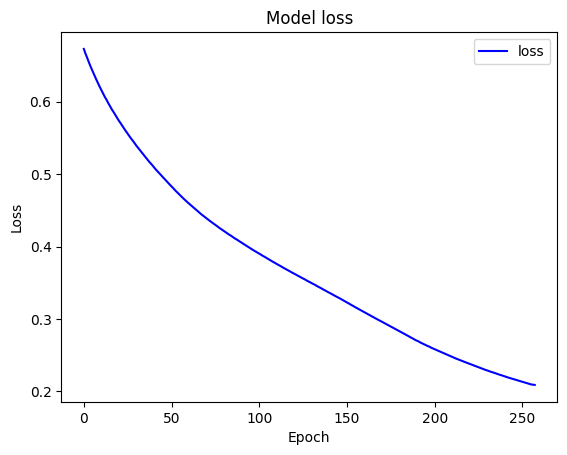

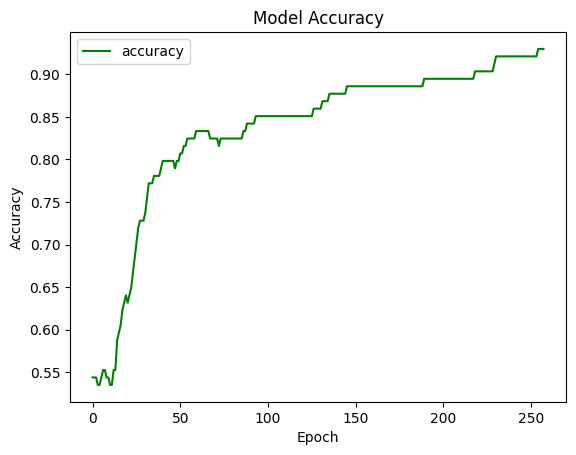

In [58]:
### 모델 손실함수 시각화
plt.plot(result.history['loss'], 'b-', label='loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 모델 정확도 시각화

plt.plot(result.history['binary_accuracy'],'g-', label='accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [59]:
import sys
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

In [60]:
result_df = pd.DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs',inplace=True)
result_df

,loss,binary_accuracy,val_loss,val_binary_accuracy,lr
epochs,,,,,
1,0.672667,0.543860,0.623990,0.589744,0.0010
2,0.665848,0.543860,0.618466,0.589744,0.0010
3,0.659889,0.543860,0.612964,0.589744,0.0010
4,0.653474,0.535088,0.607840,0.589744,0.0010
5,0.647499,0.535088,0.602925,0.615385,0.0010
...,...,...,...,...,...
254,0.210972,0.921053,0.284260,0.897436,0.0010
255,0.210416,0.929825,0.284649,0.871795,0.0010
256,0.209659,0.929825,0.284657,0.871795,0.0005


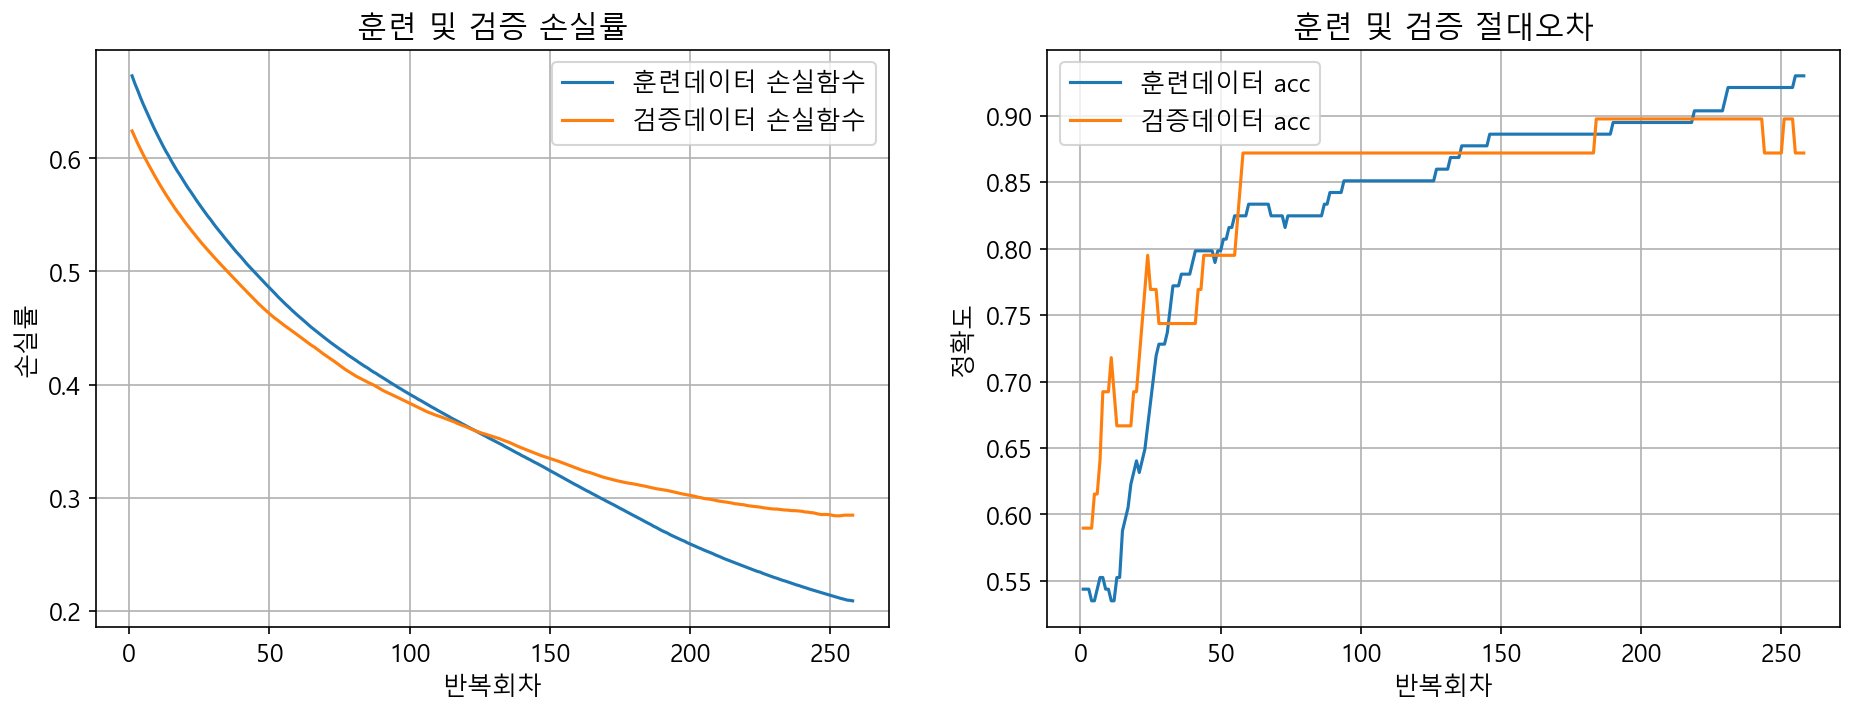

In [61]:
fig, ax = plt.subplots(1,2,figsize=(15,5),dpi = 150)

# 1) 훈련 및 검증데이터 손실함수 시각화
sns.lineplot(x=result_df.index, y='loss',data=result_df,label='훈련데이터 손실함수',ax=ax[0])
sns.lineplot(x=result_df.index,y='val_loss',data=result_df,label='검증데이터 손실함수',ax=ax[0])
ax[0].set_title('훈련 및 검증 손실률')
ax[0].set_xlabel('반복회차')
ax[0].set_ylabel('손실률')
ax[0].grid()
ax[0].legend()
# 2) 훈련 및 검증 절대오차 그리기
sns.lineplot(x=result_df.index , y='binary_accuracy',data=result_df,label='훈련데이터 acc',ax=ax[1])
sns.lineplot(x=result_df.index, y='val_binary_accuracy',data=result_df,label='검증데이터 acc',ax=ax[1])
ax[1].set_title('훈련 및 검증 절대오차')
ax[1].set_xlabel('반복회차')
ax[1].set_ylabel('정확도')
ax[1].grid()
ax[1].legend()

plt.show()
plt.close()


In [62]:
train_pred = model.predict(x_train)
train_pred

4/4 [==============================] - 0s 4ms/step


array([[0.17940061],
       [0.0653753 ],
       [0.48403946],
       [0.3421535 ],
       [0.9622476 ],
       [0.32196456],
       [0.96882325],
       [0.736     ],
       [0.9423052 ],
       [0.12281837],
       [0.9023443 ],
       [0.12897237],
       [0.1096867 ],
       [0.99946344],
       [0.9996388 ],
       [0.9999947 ],
       [0.8134978 ],
       [0.09036068],
       [0.9996856 ],
       [0.06408013],
       [0.23567314],
       [0.25924754],
       [0.0674793 ],
       [0.9660654 ],
       [0.30542412],
       [0.44439292],
       [0.2109561 ],
       [0.6695597 ],
       [0.9821205 ],
       [0.992359  ],
       [0.98605996],
       [0.9798017 ],
       [0.99294853],
       [0.9840627 ],
       [0.56525356],
       [0.3937088 ],
       [0.29688066],
       [0.99335194],
       [0.97418475],
       [0.7633281 ],
       [0.8672262 ],
       [0.9765119 ],
       [0.98154134],
       [0.06128638],
       [0.8127211 ],
       [0.23464507],
       [0.34545058],
       [0.401

In [63]:
rdf = pd.DataFrame({
    '결과값':y_train['Recur'].values,
    '예측치' :np.round(train_pred.flatten()),
    '재발확률':np.round(train_pred.flatten()*100,1)
})

rdf.head()

,결과값,예측치,재발확률
0,0,0.0,17.900000
1,0,0.0,6.500000
2,1,0.0,48.400002
3,0,0.0,34.200001
4,1,1.0,96.199997


In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
cm = confusion_matrix(rdf['결과값'],rdf['예측치'])
tn,fp,fn,tp = cm.ravel()
cmdf = pd.DataFrame([[tn,fn],[fp,tp]],index=['True','False'],columns=['Negative','Positive'])
cmdf

,Negative,Positive
True,52,5
False,3,54


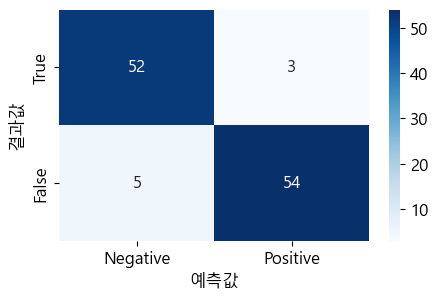

In [66]:
plt.figure(figsize=(5,3))
# 오차 행렬을 히트맵 그래프로 표현
# -> annot : 그래프의 각 칸에 수치값 출력
# -> fmt : 수치값 출력 format (여기서는 10진수)
# -> cmap : 색상맵 (<https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html>)
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['True', 'False'])
plt.xlabel('예측값')
plt.ylabel('결과값')
plt.show()

In [67]:
from sklearn.metrics import roc_auc_score, roc_curve

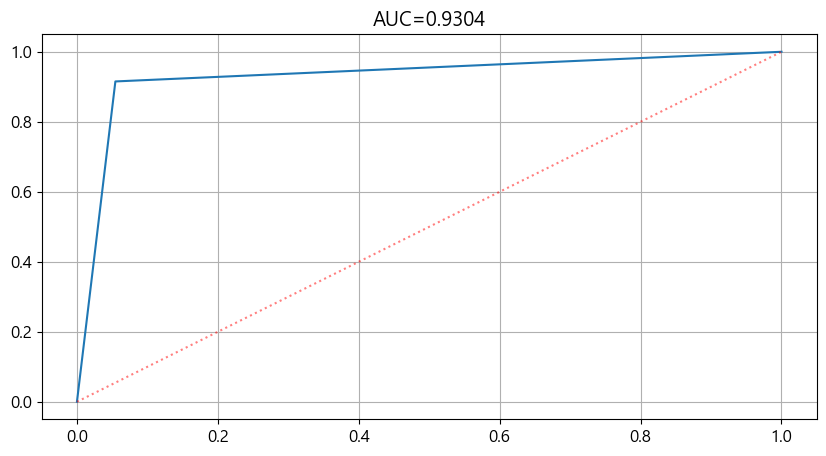

In [68]:
ras = roc_auc_score(rdf['결과값'],rdf['예측치'])

## fpr(위양성율),tpr(재현율),threshold (임계값)

fpr,tpr,threshold = roc_curve(rdf['결과값'],rdf['예측치'])
plt.figure()
sns.lineplot(x=fpr,y=tpr)
sns.lineplot(x=[0,1], y=[0,1], color='red', linestyle=':', alpha=0.5)
plt.title('AUC={:.4f}'.format(ras))
plt.grid()
plt.show()
plt.close()

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [70]:
acc = accuracy_score(rdf['결과값'],rdf['예측치'])

pre = precision_score(rdf['결과값'],rdf['예측치'])

recall = recall_score(rdf['결과값'],rdf['예측치'])

f1 = f1_score(rdf['결과값'],rdf['예측치'])

fallout = fp / (fp + tn)

spe = 1- fallout

result_df = pd.DataFrame({'정확도(Accuracy)':[acc], '정밀도(Precision)':[pre], '재현율(Recall, TPR)':[recall], '위양성율(Fallout, FPR)': [fallout], '특이성(Specificity, TNR)':[spe], 'RAS': [ras], 'f1_score':[f1]})

result_df


,정확도(Accuracy),정밀도(Precision),"재현율(Recall, TPR)","위양성율(Fallout, FPR)","특이성(Specificity, TNR)",RAS,f1_score
0,0.929825,0.947368,0.915254,0.054545,0.945455,0.930354,0.931034


In [71]:
test_pred = model.predict(x_test)
test_pred

1/2 [==============>...............] - ETA: 0s

2/2 [==============================] - 0s 3ms/step


array([[0.07973919],
       [0.12880954],
       [0.46762115],
       [0.9863577 ],
       [0.9826717 ],
       [0.9855957 ],
       [0.63856125],
       [0.8925108 ],
       [0.9812033 ],
       [0.9567254 ],
       [0.16850036],
       [0.5366986 ],
       [0.89383906],
       [0.59197277],
       [0.50465614],
       [0.90448034],
       [0.06510469],
       [0.99940944],
       [0.9757247 ],
       [0.5337473 ],
       [0.17368375],
       [0.22738458],
       [0.80288047],
       [0.9999968 ],
       [0.11336923],
       [0.08581086],
       [0.97197354],
       [0.26163143],
       [0.3277191 ],
       [0.48817343],
       [0.7511835 ],
       [0.4157939 ],
       [0.95939404],
       [0.7712791 ],
       [0.67436004],
       [0.13984334],
       [0.13539334],
       [0.08427478],
       [0.97443855]], dtype=float32)

In [72]:
test_rdf = pd.DataFrame({
    '결과값':y_test['Recur'].values,
    '예측치' :np.round(test_pred.flatten()),
    '합격확률':np.round(test_pred.flatten()*100,1)
})

In [73]:
cm = confusion_matrix(test_rdf['결과값'],test_rdf['예측치'])
tn,fp,fn,tp = cm.ravel()
cmdf = pd.DataFrame([[tn,fn],[fp,tp]],index=['True','False'],columns=['Negative','Positive'])
cmdf

,Negative,Positive
True,14,2
False,3,20


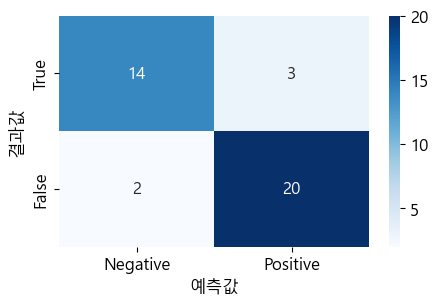

In [74]:
plt.figure(figsize=(5,3))
# 오차 행렬을 히트맵 그래프로 표현
# -> annot : 그래프의 각 칸에 수치값 출력
# -> fmt : 수치값 출력 format (여기서는 10진수)
# -> cmap : 색상맵 (<https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html>)
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['True', 'False'])
plt.xlabel('예측값')
plt.ylabel('결과값')
plt.show()

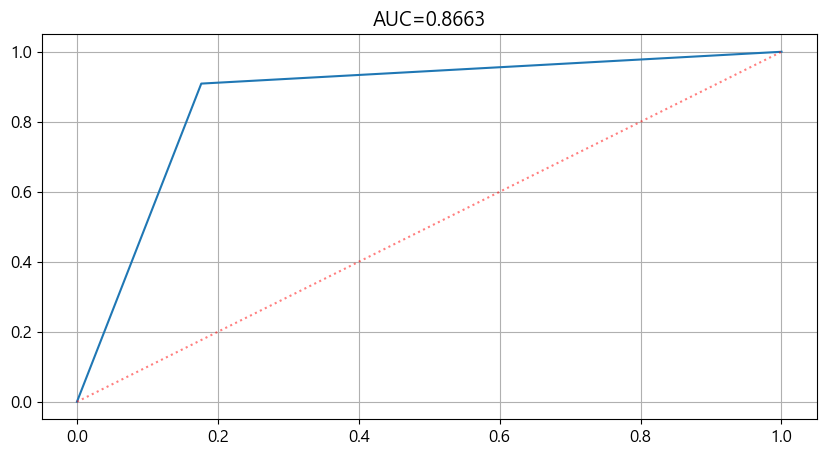

In [75]:
ras = roc_auc_score(test_rdf['결과값'],test_rdf['예측치'])

## fpr(위양성율),tpr(재현율),threshold (임계값)

fpr,tpr,threshold = roc_curve(test_rdf['결과값'],test_rdf['예측치'])
plt.figure()
sns.lineplot(x=fpr,y=tpr)
sns.lineplot(x=[0,1], y=[0,1], color='red', linestyle=':', alpha=0.5)
plt.title('AUC={:.4f}'.format(ras))
plt.grid()
plt.show()
plt.close()

In [76]:
acc = accuracy_score(test_rdf['결과값'],test_rdf['예측치'])

pre = precision_score(test_rdf['결과값'],test_rdf['예측치'])

recall = recall_score(test_rdf['결과값'],test_rdf['예측치'])

f1 = f1_score(test_rdf['결과값'],test_rdf['예측치'])

fallout = fp / (fp + tn)

spe = 1- fallout

result_df = pd.DataFrame({'정확도(Accuracy)':[acc], '정밀도(Precision)':[pre], '재현율(Recall, TPR)':[recall], '위양성율(Fallout, FPR)': [fallout], '특이성(Specificity, TNR)':[spe], 'RAS': [ras], 'f1_score':[f1]})

result_df

,정확도(Accuracy),정밀도(Precision),"재현율(Recall, TPR)","위양성율(Fallout, FPR)","특이성(Specificity, TNR)",RAS,f1_score
0,0.871795,0.869565,0.909091,0.176471,0.823529,0.86631,0.888889
